# 1. Linear regression model.
## 1.1 implementation using numpy


* loading `pandas` for convinient data processing
* loading `numpy` for vector math operations
* loading `matplot` for data visualization


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Load data with required features to DataFrame, create numpy arrays for model, create $\Theta$ vector:

In [2]:
df = pd.read_csv("CO2_Emissions_Canada.csv")
X_init = np.transpose(np.array(df.loc[(df['Fuel Type']=='Z')|(df['Fuel Type']=='X'), "Fuel Consumption Comb (L/100 km)"], ndmin=2))
Y_init = np.transpose(np.array(df.loc[(df['Fuel Type']=='Z')|(df['Fuel Type']=='X'),"CO2 Emissions(g/km)"],ndmin=2))
theta = np.zeros((X_init.shape[1]+1,1))
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Creating training set for learning, defining main functions:
* mean squared error metric
* gradient of cost function
* gradient descent algorithm

In [3]:
#define taining set as 20 samples
X = X_init[0:20]
Y = Y_init[0:20]

def Cost(theta):
    x = np.ones((X.shape[0],X.shape[1]+1))
    x[:,1:] = X
    return np.matmul(np.transpose((np.matmul(x,theta) - Y)), (np.matmul(x,theta) - Y))[0,0]  / (2*x.shape[0])


def grad(theta):
    x = np.zeros((X.shape[0],X.shape[1]+1))
    x[:,1:] = X
    return np.matmul(np.transpose(x), (np.matmul(x,theta) - Y)) / x.shape[0]  


def gradient_descent(grad, theta, iterations, alpha):
    value = []
    for i in range(0, iterations):
        theta = theta - alpha * grad(theta)
        value += [Cost(theta)]
    return value, theta

Launching gradient descent algorithm with different parameters $\alpha$:

In [4]:
a,t = gradient_descent(grad, theta, 100, 0.001)
d,t = gradient_descent(grad, theta, 30, 0.02)
b,t =  gradient_descent(grad, theta, 350000, 0.0127)
theta = t

Plotting results of algorithm execution:

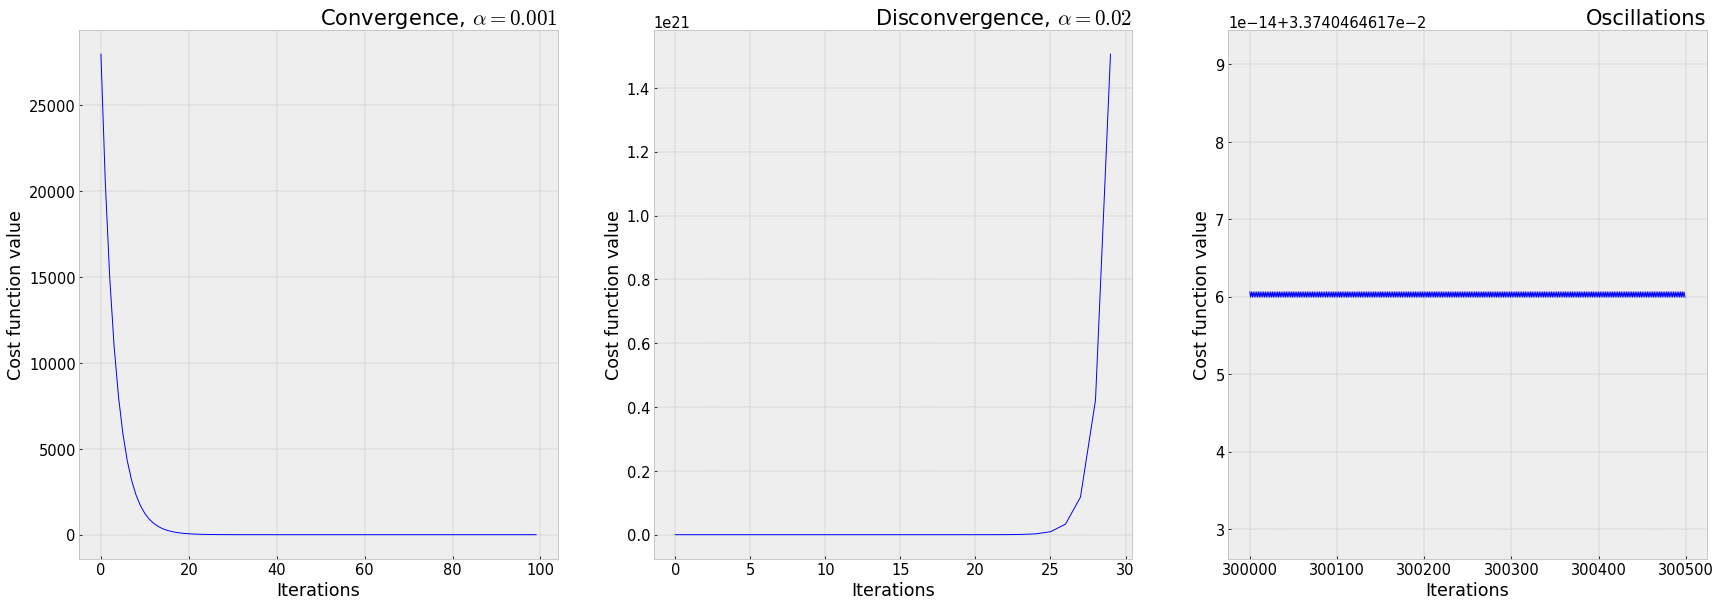

In [5]:

fig = plt.figure(figsize=(30, 10), dpi=70)
plt.style.use('bmh')
plt.rcParams.update({'font.size': 15})

ax = fig.add_subplot(131)
bx = fig.add_subplot(132)
cx = fig.add_subplot(133)

line = ax.plot([i for i in range(0, 100)], a, linewidth=1, color='blue')
line = bx.plot([i for i in range(0, 30)], d, linewidth=1, color='blue')
line = cx.plot([(i+300000) for i in range(0, 500)], b[300000:300500], linewidth=1, color='blue')
ax.set_title(r"Convergence, $\alpha = 0.001$", loc='right')
ax.set_ylabel('Cost function value')
ax.set_xlabel('Iterations')
bx.set_title(r"Disconvergence, $\alpha = 0.02$", loc='right')
bx.set_ylabel('Cost function value')
bx.set_xlabel('Iterations')
cx.set_title("Oscillations", loc='right')
cx.set_ylabel('Cost function value')
cx.set_xlabel('Iterations')
#plt.legend(frameon=True, loc='lower right')

plt.savefig("gradient_descent.png")
plt.show()


Plotting trained regression model:

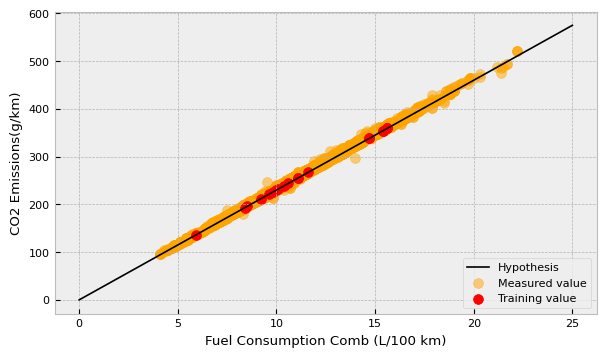

In [104]:
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.style.use('bmh')
ax = fig.add_subplot(111)

line = ax.plot([0,25], [theta[0,0] + theta[1,0]*0,theta[0,0] + theta[1,0]*25], linewidth=1.2, color='black', label='Hypothesis')
scat_pred = ax.scatter(x=X_init[100:], y=Y_init[100:], c='orange', label='Measured value', s=50, alpha=0.5)
scat_tr = ax.scatter(x=X, y=Y, c='red', label='Training value', s=50)

plt.ylabel('CO2 Emissions(g/km)')
plt.xlabel('Fuel Consumption Comb (L/100 km)')

plt.legend(frameon=True, loc='lower right')
plt.rcParams.update({'font.size': 8})


plt.savefig("training_set.png")
plt.show()


## 1.2 Implementation using PyTorch

* using embedded im module `torch.nn` models to easily build model
* using `TensorDataset` allows to access a small section of the training data using the array indexing notation. 
* using `DataLoader`, which perform splitting the data into batches of a predefined size while training. It also ensure utilities like shuffling and random sampling of the data.
* importing `.functional` package for loss function using

In [44]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn.functional as func

Convert numpy arrays which have already created to tensors:

In [45]:
input_data = torch.from_numpy(X_init).float()
target_data = torch.from_numpy(Y_init).float()
input_data[0:3]

tensor([[8.5000],
        [9.6000],
        [5.9000]])

Using `TensorDataset` for wrapping tensors and `DataLoader` for splitting data into batches and shuffling. Each sample will be retrieved by indexing tensors along the first dimension for more convenient processing.

In [46]:
# Defining dataset for training (20 samples)
training_set = TensorDataset(input_data[0:20], target_data[0:20])

# Defining data_loader
batch_size = 5
training_dloader = DataLoader(training_set, batch_size, shuffle=True)

In [47]:
# check data
for x_batch, y_batch in training_dloader:
    print(x_batch)
    print(y_batch)
    break

tensor([[10.0000],
        [ 9.6000],
        [10.6000],
        [ 9.2000],
        [ 8.5000]])
tensor([[230.],
        [221.],
        [244.],
        [212.],
        [196.]])


Creating a linear regression model with built-in class `nn.Linear`

In [48]:
model = nn.Linear(1, 1)
print('Weights:', model.weight)
print('Bias:', model.bias)

Weights: Parameter containing:
tensor([[-0.9284]], requires_grad=True)
Bias: Parameter containing:
tensor([0.5570], requires_grad=True)


In [49]:
# Defining loss function (mean squared error)
mse_func = func.mse_loss
loss = mse_func(model(training_set[:][0].float()), training_set[:][1])
print('Current loss:', loss.item())

Current loss: 82438.703125


In [50]:
# Defining optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

### Train the model

Training will be executed according to the algorithm:

1. Generating predictions
2. Calculating the loss
3. Computing gradients with respect to the weights and biases
4. Adjusing the weights 
5. Reset the gradients to zero

Work is carrying out with batches of data instead of processing the entire training data in every iteration.


In [51]:
# Defining a utility function that trains the model for a given number of epochs.
def fitting(model, loss_func, optimizer, training_data_loader, epochs_count):
    loss_list = []
    for epoch in range(epochs_count):
        for x_batch,y_batch in training_data_loader:
            # make predictions
            pred = model(x_batch.float())
            # calculate loss 
            loss = loss_func(pred, y_batch)
            # calculate gradient
            loss.backward()
            # update params with gradients
            optimizer.step()
            # set the gradients to zero
            optimizer.zero_grad()
        loss_list += [loss.item()]
        # Print the progress
        if not (epoch+1) % 5:
            print('Epoch {}, Loss: {}'.format(epoch+1, loss.item()))
    return loss_list

In [52]:
# training
l = fitting(model, mse_func, optimizer, training_dloader, 100)

Epoch 5, Loss: 28726.587890625
Epoch 10, Loss: 7728.02197265625
Epoch 15, Loss: 3313.40966796875
Epoch 20, Loss: 718.041015625
Epoch 25, Loss: 231.98159790039062
Epoch 30, Loss: 80.88118743896484
Epoch 35, Loss: 16.029621124267578
Epoch 40, Loss: 3.9511256217956543
Epoch 45, Loss: 3.416796922683716
Epoch 50, Loss: 0.8697046041488647
Epoch 55, Loss: 0.5912127494812012
Epoch 60, Loss: 0.19088497757911682
Epoch 65, Loss: 0.4149249196052551
Epoch 70, Loss: 0.2841630280017853
Epoch 75, Loss: 0.7003996968269348
Epoch 80, Loss: 0.20268940925598145
Epoch 85, Loss: 0.46466368436813354
Epoch 90, Loss: 0.4112522006034851
Epoch 95, Loss: 0.45783138275146484
Epoch 100, Loss: 0.2758997976779938


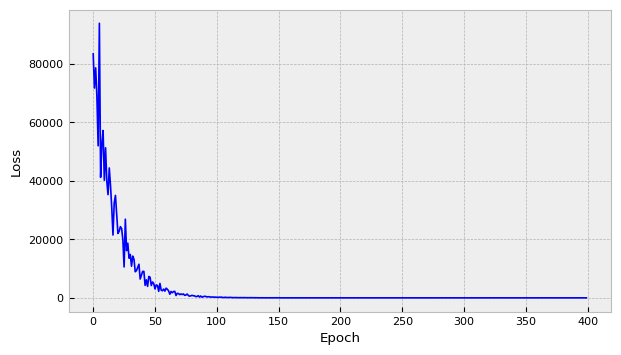

In [53]:
#plotting convergence of loss function
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.style.use('bmh')
ax = fig.add_subplot(111)

line = ax.plot(l, linewidth=1.2, color='blue', label='Loss')

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.rcParams.update({'font.size': 8})

plt.savefig("torch_convergence.png")
plt.show()


Plotting learned model:

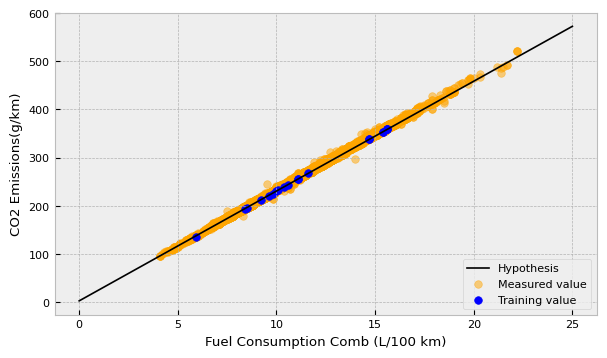

In [103]:
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.style.use('bmh')
ax = fig.add_subplot(111)

x_dots = np.array((0, 25),ndmin=2).transpose()
y_dots = model(torch.from_numpy(x_dots).float()).detach().numpy()

line = ax.plot(x_dots, y_dots, linewidth=1.2, color='black', label='Hypothesis')
scat_pred = ax.scatter(x=input_data, y=target_data, c='orange', label='Measured value', s=30, alpha=0.5)
scat_tr = ax.scatter(x=training_set[:][0], y=training_set[:][1], c='blue', label='Training value', s=30)

plt.ylabel('CO2 Emissions(g/km)')
plt.xlabel('Fuel Consumption Comb (L/100 km)')

plt.legend(frameon=True, loc='lower right')
plt.rcParams.update({'font.size': 8})


plt.savefig("torch_using_learned.png")
plt.show()